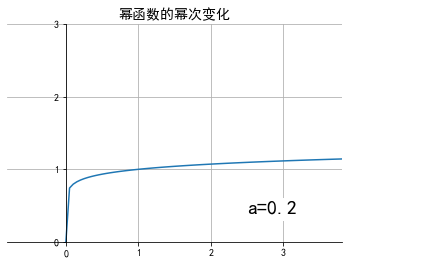

In [1]:
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
import matplotlib.patches as mpathes

fig,pltsub=plt.subplots()

x1=np.linspace(0,5,100) #替换这里的横轴显示范围和取样点个数
y1=x1**0.1 #替换这里的函数表达式

pltsub.axis('equal')
line1,=pltsub.plot(x1, y1)
x_major_locator=MultipleLocator(1) #把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(1) #把y轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)#把y轴的主刻度设置为1的倍数
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

a=0.1

plt.axis('equal')
plt.grid()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.title(u'幂函数的幂次变化', fontsize=14)
xyrect = np.array([2.4,0.2])
    
def update(i):
    plt.xlim(0,3) #x轴的刻度范围设置
    plt.ylim(0,3) #y轴的刻度范围设置
    a=0
    if i<50:
        a=0.1+0.1*i
        line1.set_ydata(x1**a)
    else:
        a=0.1+0.1*(100-i)
        line1.set_ydata(x1**a)
    #plt.title('a='+str(a), fontsize=14)
    strdisplay = 'a='+str(a)
    plt.text(2.5,0.3, u"■■■■■■",fontsize=28,color='white')
    plt.text(2.3,0.3, u"■■■■■■",fontsize=28,color='white')
    plt.text(2.5,0.4, strdisplay[0:5], fontsize=20)
    return line1,
def init():
    line1.set_ydata(x1**0.1)
    return line1,
 
ani=animation.FuncAnimation(fig=fig,func=update,frames=100,init_func=init,interval=20,blit=False)
ani.save('test_animation.gif',writer='imagemagick')
plt.show()

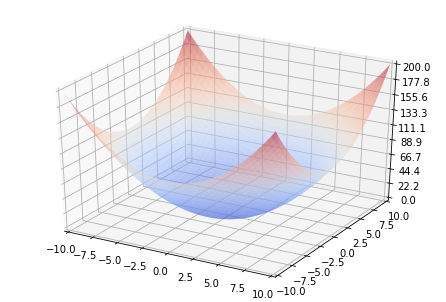

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.pyplot import MultipleLocator

fig1=plt.figure()
ax=Axes3D(fig1)
X,Y=np.mgrid[-10:10:50j,-10:10:50j] #替换这里的xy轴显示范围和取样点个数
Z=np.power(X,2)+np.power(Y,2) #替换这里的函数表达式
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,alpha=0.5)
ax.set_xlabel('x', color='r')  
ax.set_ylabel('y', color='g')  
ax.set_zlabel('z', color='b')
xmajorLocator = MultipleLocator(1) #将x主刻度标签设置为1的倍数
ymajorLocator = MultipleLocator(1) #将x主刻度标签设置为1的倍数
zmajorLocator = MultipleLocator(20) #将x主刻度标签设置为1的倍数
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.zaxis.set_major_locator(zmajorLocator)
 
i=0

try:
    while i<10:
        i+=1
        #清除原有图像
        plt.cla()
        p1 = np.random.randint(5)
        #设置Z值
        if i<5:
            Z=(np.power(X,2)+np.power(Y,2))*(1+i*0.1) #替换这里的函数表达式
        else:
            Z=(np.power(X,2)+np.power(Y,2))*(1+(10-i)*0.1) #替换这里的函数表达式
        #画3D图
        ax.set_zlim(0, 200)
        ax.set_xlim(-10,10)
        ax.set_ylim(-10,10)
        ax.set_zticks(np.linspace(0,200,10))  
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,alpha=0.5)
        #通过暂停和清除来不断更新图像，形成动图
        plt.savefig("./test"+str(i)+".png",dpi=500,bbox_inches = 'tight')
except:
    pass

plt.show()

#construct gif with imagemagick
#convert -delay 10 *.png gif.gif

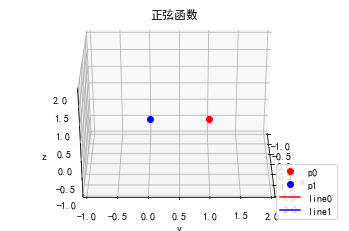

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1, projection='3d')  # 指定三维空间做图
 
t = np.linspace(0, 4, 200)  # 在0到4之间，均匀产生200点的数组
theta = t * 2 * np.pi  # 角度
 
# 生成曲线数组
z = t
x = np.sin(theta)
y = np.cos(theta)
y0 = np.empty(200)
y0.fill(0)
 
# 运动的点
point0, = ax.plot([x[0]], [y[0]], [z[0]], 'ro', label='p0',color='red')
point1, = ax.plot([x[0]], [y0[0]], [z[0]], 'ro', label='p1',color='blue')
 
# 曲线
line0, = ax.plot([x[0]], [y[0]], [z[0]], label='line0',color='red')
line1, = ax.plot([x[0]], [y0[0]], [z[0]], label='line1',color='blue')
 
# 设置显示的范围和描述
x_min = 0
y_min = 0
z_min = 0
x_max = 1
y_max = 1
z_max = 1
margin = 1
ax.set_xlim(x_min - margin, x_max + margin)
ax.set_ylim(y_min - margin, y_max + margin)
ax.set_zlim(z_min - margin, z_max + margin)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# 标题
ax.set_title(u'正弦函数')
ax.view_init(30, 35)
# 设置标签在右下角
ax.legend(loc='lower right')
 
 
def animate(i):
    line0.set_xdata(x[:i + 1])
    line0.set_ydata(y[:i + 1])
    line0.set_3d_properties(z[:i + 1])
    point0.set_xdata(x[i])
    point0.set_ydata(y[i])
    point0.set_3d_properties(z[i])
    line1.set_xdata(x[:i + 1])
    line1.set_ydata(y0[:i + 1])
    line1.set_3d_properties(z[:i + 1])
    point1.set_xdata(x[i])
    point1.set_ydata(y0[i])
    point1.set_3d_properties(z[i])
    ax.view_init(azim=i)
 
rot_animation = animation.FuncAnimation(fig, animate, frames=np.arange(0,180+2,2),interval=200)
 
rot_animation.save('sinerealpart.gif', writer='pillow')